In [358]:
#Reference- https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125
# Description- After taking into consideration all the parameters our classifier will predict the fatal state class code(NSP). NSP has 3 classes namely N=normal; S=suspect; P=pathologic

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [359]:
data=pd.read_excel("/Users/rohan/Desktop/cs 109/Work/Multiclass_logreg_Cardography/CTG.xls", sheet_name='Raw Data')
data.head(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,1996-05-03,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,1996-05-03,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,1995-02-22,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,1995-02-22,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [360]:
data.shape

(2130, 40)

In [361]:
data_rmvCol = data.drop(columns=['FileName', 'SegFile','Date'])
data_rmvCol.head(10)

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [362]:
df = data_rmvCol.dropna()

In [363]:
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [364]:
df.shape

(2126, 37)

In [365]:
df['NSP'].unique()

array([2., 1., 3.])

In [366]:
df['NSP'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

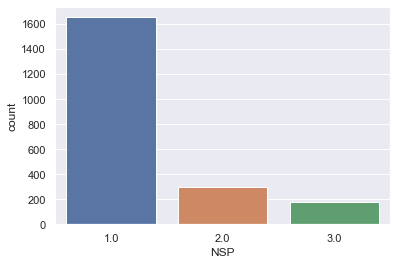

In [367]:
sns.countplot(x='NSP',data=df)
plt.show()

In [368]:
x = df.iloc[:,:-1]
print(x.shape)
print(type(x))
x.head(10)

(2126, 36)
<class 'pandas.core.frame.DataFrame'>


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0
7,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0
8,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
9,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
10,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,86.0,0.3,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0


In [369]:
y = df.iloc[:,-1]
print(y.shape)
print(type(y))
y.head(10)

(2126,)
<class 'pandas.core.series.Series'>


1     2.0
2     1.0
3     1.0
4     1.0
5     1.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
Name: NSP, dtype: float64

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [371]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=7)

print(x_train.shape)
print(type(x_train))
print(y_train.shape)
print(type(y_train))
print(x_test.shape)
print(type(x_test))
print(y_test.shape)
print(type(y_test))

(1700, 36)
<class 'pandas.core.frame.DataFrame'>
(1700,)
<class 'pandas.core.series.Series'>
(426, 36)
<class 'pandas.core.frame.DataFrame'>
(426,)
<class 'pandas.core.series.Series'>


In [372]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
y_pred = logreg.predict(x_test)
print(type(y_pred))
y_pred

<class 'numpy.ndarray'>


array([1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 3., 3., 1., 1., 3., 1., 1., 2., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 1.

In [374]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[327,   2,   0],
       [  2,  54,   0],
       [  0,   0,  41]], dtype=int64)

In [376]:
#Accuracy = (236+41+34)/319 = 97.5% for iter=100 or 1000 and test_size=0.15 & random_state=0
#Misclassification Rate = 2.5%

#Accuracy = (324+49+42)/426 = 97.4% for iter=100 or 1000 and test_size=0.20 and random_state=0
#Misclassification Rate = 2.6%

#Accuracy = (327+54+41)/426 = 99% for iter=100 or 1000 and test_size=0.20 and random_state=7
#Misclassification Rate = 1%


In [383]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9906103286384976


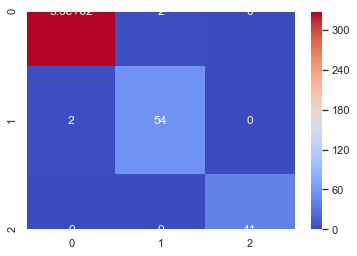

In [399]:
sns.heatmap(pd.DataFrame(cnf_matrix) , annot=True, cmap="coolwarm")
plt.show()

Text(0.5, 12.5, 'Predicted label')

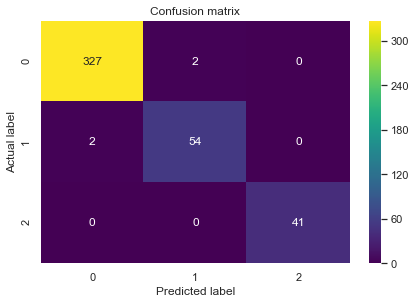

In [410]:

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.set_ylim([3,0]) #https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')